# Digital Diagnosis: Children's Pnemonia Identification via Chest X-rays

# Business Problem

Pneumonia is a common infection that causes inflammation and possible fluid accumulation in the air sacs of the lungs.


[In China, pneumonia is one of the leading causes of death for children under 5 years old](https://journals.lww.com/md-journal/Fulltext/2018/11160/The_drug_use_to_treat_community_acquired_pneumonia.42.aspx#:~:text=More%20than%202%20million%200,the%20age%20of%205%20years.)


Causes of pneumonia include bactria, virus and fungal sources. 

[Pediatric pneumonia is generally diagnosed based on the time of the year and the results of a physical exam, paying attention the child's breathing and listening to the lungs](https://www.nationwidechildrens.org/conditions/pneumonia). Further testing can include blood tests and chest X-rays. 


Even with modern medicine, pneumonia can be misdiagnosed. A fast and accurate diagnosis allow doctors to treat the infection with the appropirate care. 


One application of machine learning in medicine is digital diagnosis. 


We have been tasked with developing an identification model to determine if a chest X-ray indicates the presence of pneumonia. False negative results are to be minimized compared to false positives.

The data is sourced from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). It is already split into three folders for training, validation and testing. All the chest radiographs were screened for quality and diagnostic labeling performed by physicians. The images were collected during routine clinicial care of pediatric patients between one and five years old from Guangzhou Women and Children's Medical Center in Guangzhou, China.

# Imports

In [1]:
from os import listdir
from os.path import isfile, join

import math

import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

Helper functions:
- get_ratio: return the ratio of an 2D image array width:height
- resize_and_crop: returns a scaled and cropped image

In [14]:
def get_ratio(array):
    return array.shape[0]/array.shape[1]

def resize_and_crop(image, new_size=256):
    """
    This function will take in an image, resize and crop it to a square.
    The default new length for a side is 256 pixels.
    The function will output a new square, centered image.
    
    """
    # get width and height from passed image   
    width, height = image.size
    
    # set up variables for new width and height
    new_width = 0
    new_height = 0
    
    # based on larger side changing to new_size, calculate the ratio and length of
    # the shorter side
    if width > height:
        ratio_wh = width / height
        new_width = int(ratio_wh * new_size)
        new_height = new_size
    else:
        ratio_hw = height / width
        new_width = new_size
        new_height = int(ratio_hw * new_size)
        
    # save the scaled image
    scaled_image = image.resize((new_width, new_height))
    
    # if the image is wider, crop in equally from the sides to preserve center of image
    if new_width > new_height:
        # we are only cropping in from left and right, so set top crop to 0 and bottom to new_size
        top = 0
        bottom = new_size
        # set the left and right side crop values
        left = int(math.ceil((new_width - new_size) / 2))
        right = new_width - int(math.floor((new_width - new_size) / 2))
        # save the cropped image
        cropped_image = scaled_image.crop((left, top, right, bottom))
    
    # if the image is taller, crop equally from the top/bottom to preserve center of image
    else:
        # we are only cropping top and bottom, so set left crop to 0 and right crop to new_size
        left = 0
        right = new_size
        # set the top and bottom crop values
        top = int(math.ceil((new_height - new_size) / 2))
        bottom = new_height - int(math.floor((new_height - new_size) / 2))
        # save the cropped image
        cropped_image = scaled_image.crop((left, top, right, bottom))
    
    return cropped_image

# Image Preprocessing

In [12]:
folder_names = ['train', 'test', 'val']
img_names = ['NORMAL', 'PNEUMONIA']

# loop through the different combinations of folder name prefixes
for folder in folder_names:
    for img_type in img_names:
        
        # set up the path to each folder of images
        path = f'./chest_xray/{folder}/{img_type}'
        
        # create a list of the filenames in that directory
        filelist = list(listdir(path))
        
        # create empty lists for the image arrays and target values
        array_list = []
        target_list = []
        
        # loop through each file in the folder
        for file_name in filelist:
            
            # set the filepath for the file in question
            filepath = path + r'/' + file_name
            
            # open the image
            image = Image.open(filepath)
            
            # some of our images are in RGB and need to convert to greyscale
            if image.mode == 'RGB':
                image = image.convert('L')
            
            # resize and crop the image (save if necessary)
            image_modified = resize_and_crop(image)
#             image_modified.save(filepath)

            # convert the image to a numpy array
            image_as_array = np.asarray(image_modified)
            
            # append the image array to the array_list
            array_list.append(image_as_array)
        
            # set the target value based on the img_type and append to target_list
            if img_type == 'NORMAL':
                target_list.append(0)
            else:
                target_list.append(1)
        
        # set path for saving numpy data
        data_path = f'./data/'
        
        final_array = np.asarray(array_list)
        target_array = np.asarray(target_list)
        
        np.save(file=f'{data_path}{folder}_{img_type.lower()}_data.npy', arr=final_array)
        np.save(file=f'{data_path}{folder}_{img_type.lower()}_target.npy', arr=target_array)

## Testing

Images in the train/PNEUMONIA folder were causing some issues, so we needed to look deeper into the issues.

In [15]:
path = f'./chest_xray/train/PNEUMONIA'
filelist = list(listdir(path))

print(f"There are {len(filelist)} files in the train/PNEUMONIA folder")

There are 3875 files in the train/PNEUMONIA folder


In [16]:
file_count = 0
mess_count = 0
array_list = []
shape_list = []

ratios = []
error_ratios = []

for file_name in filelist:
    
    filepath = path + r'/' + file_name
    image = Image.open(filepath)
    image_as_array = np.asarray(image)
    
    ratio = image_as_array.shape[0] / image_as_array.shape[1]
    ratios.append((ratio, file_name))
    
    if len(image_as_array.shape) == 3:
        error_ratios.append(ratio)      
        mess_count += 1
        
        image_as_array = image_as_array[:, :, 0]
    
    array_list.append(image_as_array)
    file_count += 1

# final_array = np.asarray(array_list)
print(f"There are {mess_count} files with errors in shape")

There are 283 files with errors in shape


In [5]:
ratio_df = pd.DataFrame(ratios, columns=['ratio', 'filename'])
ratio_df.describe()

,ratio
count,3875.000000
mean,0.676938
std,0.103208
min,0.295964
25%,0.608394
50%,0.672269
75%,0.739437
max,1.197044


<AxesSubplot:ylabel='Frequency'>

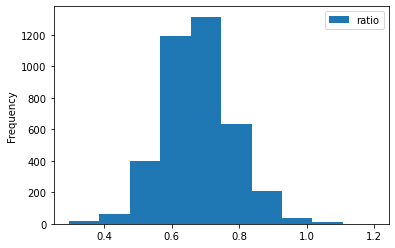

In [6]:
ratio_df.plot(kind='hist');

In [17]:
low_ratio_count = len(ratio_df[ratio_df.ratio <= 0.5])
print(f"There are {low_ratio_count} images in this folder with a ratio less than 1:2")

There are 126 images in this folder with a ratio less than 1:2


In [8]:
ratio_df[(ratio_df.ratio > 0.5) & (ratio_df.ratio <= 0.6)]

,ratio,filename
7,0.560748,person1004_virus_1686.jpeg
35,0.572327,person1020_virus_1710.jpeg
40,0.584416,person1023_virus_1714.jpeg
46,0.526316,person1028_bacteria_2960.jpeg
48,0.537037,person1029_virus_1721.jpeg
...,...,...
3850,0.567568,person989_virus_1667.jpeg
3859,0.581081,person993_virus_1671.jpeg
3867,0.520325,person997_virus_1678.jpeg
3871,0.554140,person9_bacteria_38.jpeg


In [18]:
def compare_cropping(index_value):
    
    image_path = f"./chest_xray/train/PNEUMONIA/{ratio_df.iloc[index_value]['filename']}"
    image = Image.open(image_path)
    
    display(image)
    
    cropped_image = resize_and_crop(image)
    display(cropped_image)
    
    pass

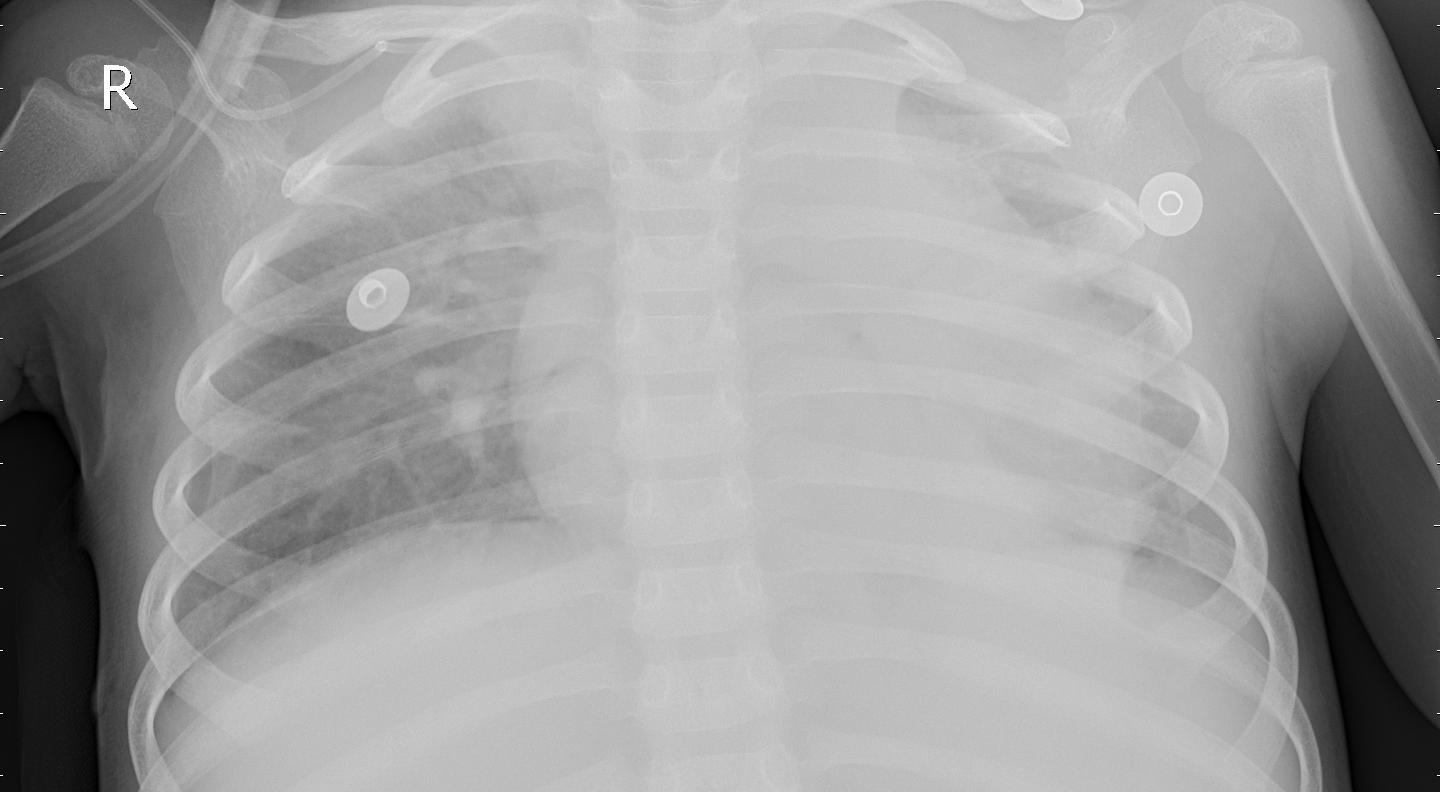

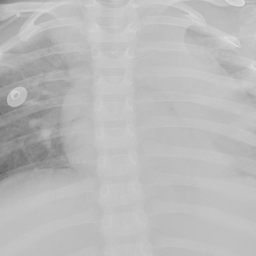

In [19]:
compare_cropping(599)

# Loading Data

In [21]:
data_path = f"./data/"
data_files = list(listdir(data_path))
data_files

['test_normal_data.npy',
 'test_normal_target.npy',
 'test_pneumonia_data.npy',
 'test_pneumonia_target.npy',
 'train_normal_data.npy',
 'train_normal_target.npy',
 'train_pneumonia_data.npy',
 'train_pneumonia_target.npy',
 'val_normal_data.npy',
 'val_normal_target.npy',
 'val_pneumonia_data.npy',
 'val_pneumonia_target.npy']

In [32]:
train_normal_data = np.load(data_path + '/train_normal_data.npy')
train_pneumonia_data = np.load(data_path + '/train_pneumonia_data.npy')
train_data = np.concatenate((train_normal_data, train_pneumonia_data))

train_normal_target = np.load(data_path + '/train_normal_target.npy')
train_pneumonia_target = np.load(data_path + '/train_pneumonia_target.npy')
train_target = np.concatenate((train_normal_target, train_pneumonia_target))

val_normal_data = np.load(data_path + '/val_normal_data.npy')
val_pneumonia_data = np.load(data_path + '/val_pneumonia_data.npy')
val_data = np.concatenate((val_normal_data, val_pneumonia_data))

val_normal_target = np.load(data_path + '/val_normal_target.npy')
val_pneumonia_target = np.load(data_path + '/val_pneumonia_target.npy')
val_target = np.concatenate((val_normal_target, val_pneumonia_target))

test_normal_data = np.load(data_path + '/test_normal_data.npy')
test_pneumonia_data = np.load(data_path + '/test_pneumonia_data.npy')
test_data = np.concatenate((test_normal_data, test_pneumonia_data))

test_normal_target = np.load(data_path + '/test_normal_target.npy')
test_pneumonia_target = np.load(data_path + '/test_pneumonia_target.npy')
test_target = np.concatenate((test_normal_target, test_pneumonia_target))

In [34]:
print(f"Train data/target shapes: {train_data.shape}, {train_target.shape}")
print(f"Val data/target shapes: {val_data.shape}, {val_target.shape}")
print(f"Test data/target shapes: {test_data.shape}, {test_target.shape}")

Train data/target shapes: (5216, 256, 256), (5216,)
Val data/target shapes: (16, 256, 256), (16,)
Test data/target shapes: (624, 256, 256), (624,)
